In [1]:
# project: p5
# submitter: hbian8
# partner: none
# hours: 13

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import zipfile
import edgar_utils
from edgar_utils import lookup_region
import re

In [4]:
zip_file = zipfile.ZipFile("server_log.zip")
df = pd.read_csv(zip_file.open('rows.csv'))

In [5]:
#q1
df_size = df['size']
total = int(sum(df_size))
total

24801002666

In [6]:
#q2
IP_addr = {}
for IP in df['ip']:
    if IP not in IP_addr:
        IP_addr[IP] = 1;
    else:
        IP_addr[IP] += 1
ip_df = pd.Series(IP_addr)       
ip_df = ip_df.sort_values(ascending=False)
ip_df[0:10].to_dict()


{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [7]:
#q3
counts = len([code for code in df['code'] if code > 400])
total = len(df["code"])
fraction = counts/total
fraction

0.03466852724527611

In [8]:
#q4
filename = ''
files = {}
for index in range(len(df)):
    filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
    if filename not in files:
        files[filename] = 1
    else:
        files[filename] += 1
files_df = pd.Series(files)       
files_df = files_df.sort_values(ascending=False)
str(files_df[:1].index[0])


'1627631/0001627631-15-000004/.txt'

In [9]:
#q5
count = len([crawler for crawler in df['crawler']  if crawler != 0.0])
count

971

In [10]:
#q6
regions = {}
for ip in df['ip']:
    country = lookup_region(ip)
    if country not in regions:
        regions[country] = 1
    else:
        regions[country] += 1
regions_df = pd.Series(regions)
regions_df.sort_values(ascending=False)
str(regions_df[:1].index[0])

'United States of America'

In [11]:
#q7
region_ip = {}
regions_high_volume = {}
for ip in IP_addr:
    region = lookup_region(ip)
    if region not in region_ip:
        region_ip[region] = 1
    else:
        region_ip[region] += 1
    if region not in regions_high_volume:
            regions_high_volume[region] = 0
    if IP_addr[ip] > 1000:
        regions_high_volume[region] += 1
for region in regions_high_volume:
    regions_high_volume[region] = regions_high_volume[region] / region_ip[region]
regions_high_volume


{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0.0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0.0,
 'Germany': 0.0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0.0,
 'Netherlands': 0.0,
 'Sweden': 0.0,
 'Sudan': 0.0,
 'Estonia': 0.0,
 'Russian Federation': 0.0,
 'Tanzania, United Republic of': 0.0,
 'Yemen': 0.0,
 'Algeria': 0.0,
 'Ukraine': 0.0,
 'Slovakia': 0.0,
 'Viet Nam': 0.0,
 'Denmark': 0.0,
 'Singapore': 0.0,
 'Switzerland': 0.0,
 'Thailand': 0.0,
 'South Africa': 0.0,
 'Italy': 0.0,
 'Poland': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Brazil': 0.0,
 'Morocco': 0.0,
 'Malaysia': 0.0,
 'Hungary': 0.0,
 'Japan': 0.0,
 'Luxembourg': 0.0,
 'Romania': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Bangladesh': 0.0

In [12]:
#q8
filing_dict = {}
with zipfile.ZipFile('docs.zip') as docs_zip:
    for file in docs_zip.namelist():
        if re.search(r'htm', file) or re.search(r'html', file):
            html_file = docs_zip.read(file)
            filing_dict[file] = edgar_utils.Filing(str(html_file))
filing_dict['850693/0000850693-07-000159/-index.htm'].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [13]:
#q9
states = {}
for filing in filing_dict:
    state = filing_dict[filing].state()
    if state != None:
        if state not in states:
            states[state] = 1
        else:
            states[state] += 1
states_df = pd.Series(states)
states_df = states_df.sort_values(ascending=False)
states_df.to_dict()

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'PA': 25,
 'IL': 25,
 'CO': 25,
 'NJ': 23,
 'FL': 21,
 'MN': 15,
 'VA': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'WI': 9,
 'NC': 9,
 'GA': 8,
 'OK': 7,
 'NV': 6,
 'IA': 6,
 'OX': 6,
 'AZ': 5,
 'KS': 5,
 'UT': 5,
 'TN': 4,
 'MO': 4,
 'IN': 4,
 'WA': 3,
 'WV': 2,
 'OR': 2,
 'LA': 2,
 'NE': 2,
 'KY': 2,
 'AL': 1,
 'SD': 1,
 'MS': 1,
 'VT': 1,
 'ID': 1,
 'AR': 1,
 'NM': 1,
 'DC': 1,
 'ME': 1}

In [14]:
#q10
sics = {}
for filing in filing_dict:
    sic = filing_dict[filing].sic
    if sic != None:
        if sic not in sics:
            sics[sic] = 1
        else:
            sics[sic] += 1
sics

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [15]:
#q11
sics_num = {}
for index in range(len(df)):
    filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
    if filename in filing_dict:
        sic = filing_dict[filename].sic
        if sic != None:
            if sic not in sics_num:
                sics_num[sic] = 1
            else:
                sics_num[sic] += 1
sics_num_df = pd.Series(sics_num)
sics_num_df = sics_num_df.sort_values(ascending=False)
sics_num_df.to_dict()

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 2510: 171,
 6282: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 5311: 90,
 6798: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 900: 39,
 7370: 39,
 3621: 38,
 6513: 38,
 5172: 36,
 4213: 35,
 5900: 35,
 3990: 34,
 5122: 34,
 2070: 33,
 5944: 33,
 8090: 32,
 1700: 31,
 4922: 31,
 3312: 31,
 1381: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 3663: 23,
 4955: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 6792: 19,
 5812: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 6035: 7,
 4833: 7,
 2430: 6,
 3571: 6,
 3674: 5,
 3679: 5,
 4813: 4,
 4812: 4,
 3678: 4,
 5500: 4,
 1531: 4,
 6411: 3,
 3576: 3,
 8062: 3,
 2800: 3,
 3420: 3,
 1400: 3,
 2111: 2,
 7900: 2,
 5661: 2,
 6141: 

In [16]:
#q12
hours = {}
time_df = df['time']
date = pd.to_datetime(time_df)
for hour in date.dt.hour:
    if hour not in hours:
        hours[hour] = 1
    else:
        hours[hour] += 1
hours


{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

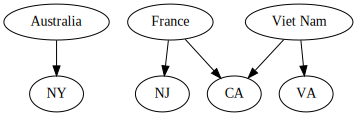

In [17]:
#q13
from graphviz import Graph, Digraph
digraph = Digraph()
digraph.node('Australia')
digraph.node('France')
digraph.node('Viet Nam')
Australia = []
France = []
Viet_Nam = []
for index in range(len(df)):
    ip = df['ip'][index]
    region = lookup_region(ip)
    if region == 'Australia':
        filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
        if filename in filing_dict:
            Australia.append(filing_dict[filename].state())
    elif region == 'France':
        filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
        if filename in filing_dict:
            France.append(filing_dict[filename].state())
    elif region == 'Viet Nam':
    # filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
        filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
        if filename in filing_dict:
            Viet_Nam.append(filing_dict[filename].state())
state_visited = {'Australia': [], 'France':[], 'Viet Nam': []}
for state in Australia:
    if state not in state_visited['Australia']:
        digraph.node(state)
        digraph.edge('Australia', state)
        state_visited['Australia'].append(state)
for state in France:
    if state not in state_visited['France']:
        digraph.node(state)
        digraph.edge('France', state)
        state_visited['France'].append(state)
for state in Viet_Nam:
    if state not in state_visited['Viet Nam']:
        digraph.node(state)
        digraph.edge('Viet Nam', state)
        state_visited['Viet Nam'].append(state)
digraph



In [18]:
#q14
addresses = {}
addr_dict = {}
filenames = []
for index in range(len(df)):
    filename = str(int(df['cik'][index])) + '/' + str(df['accession'][index]) + '/' + str(df['extention'][index])
    if filename in filing_dict:
        filenames.append(filename)
for filename in filenames:
    addr_list  = filing_dict[filename].addresses
    for addr in addr_list:
        addr = addr.replace('\\n', '')
        if addr not in addresses:
            addresses[addr] = 1
        else:
            addresses[addr] += 1
for addr in addresses:
    if addresses[addr] >= 225:
        addr_dict[addr] = addresses[addr]
addr_df = pd.Series(addr_dict)  
addr_df = addr_df.sort_values(ascending=False)
addr_df.to_dict()


{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225}

<AxesSubplot:>

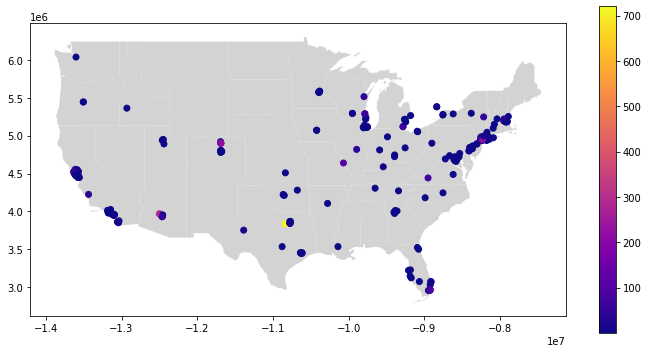

In [19]:
#q15
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import box
df = geopandas.read_file('shapes/cb_2018_us_state_20m.shp')
window = box(-130, 20, -55, 50)
usa = df.intersection(window)

figure, ax = plt.subplots(figsize=(12,6))

addrs_dict = addr_df.to_dict()
locations = geopandas.read_file('locations.geojson')
locations = locations[locations.intersects(window)]
usa = usa.to_crs("epsg:3395")
locations = locations.to_crs(usa.crs)
# window = window.to_crs(usa.crs)
usa.plot(ax=ax, color = 'lightgray')
# locations.plot(ax=ax)
# print(locations.iloc(1))
location_dict = locations.to_dict()
count = 0
addresses_dict = {'address': [], 'geometry': [], 'clk': []}
for addr in location_dict['address']:
    if location_dict['address'][addr] in addresses:
        #     count += 1
        addresses_dict['address'].append(location_dict['address'][addr])
        addresses_dict['geometry'].append(location_dict['geometry'][addr])
        addresses_dict['clk'].append(addresses[location_dict['address'][addr]])
addresses_df = geopandas.GeoDataFrame(addresses_dict, crs = usa.crs)
# addresses_df = addresses_df.to_crs(usa.crs)
addresses_df.plot(ax = ax, column = 'clk', cmap = "plasma", legend=True)
        